# Unsupervised Learning (K Means)
---------------

1. k-means clustering algorithm ,Breaks observations into `pre-defined number of clusters`
![us4](https://github.com/rritec/datahexa/blob/dev/images/ml/us4.png?raw=true)

2. In k means clustering, we have to specify `the number of clusters we want the data to be grouped into`. 
    - This is `big disadvantage` as i need to provide K value upfront
3. The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. Then, the algorithm iterates through two steps:

    a.	Reassign data points to the cluster whose centroid is closest.
    
    b.	Calculate new centroid of each cluster.
    
    
3.	These two steps are repeated till the within cluster variation cannot be reduced any further.
4.	The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids.

### Step 1: import  required modules

In [28]:
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Step 2: load iris data

In [29]:
iris = datasets.load_iris()
X = iris.data 

In [30]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

### Step 3: k-means clustering with scikit-learn

In [31]:
model = KMeans(n_clusters=3) # we need to define number of clusters
model.fit(X) # in case of supervised we used to provide model.fit(X,y)
labels = model.predict(X)
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [32]:
y = iris["target"]
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Step 4: Understand Result

In [33]:
import pandas as pd
df=pd.DataFrame(data=iris.data,columns=iris.feature_names)
df["species"]=iris.target
df.species=df.species.replace([0,1,2],['setosa', 'versicolor', 'virginica'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [34]:
#create crosstab
pd.crosstab(df['species'],labels) # Real Label # machine pred Label

col_0,0,1,2
species,,,
setosa,0,50,0
versicolor,48,0,2
virginica,14,0,36


### Step 5: Clustering quality:
1.	Inertia measures clustering quality
2.	Measures how spread out the clusters are (lower is beter)
3.	Distance from each sample to centroid of its cluster
4.	After fit(), available as attribute `inertia_`
5.	k-means atempts to minimize the inertia when choosing clusters
 


In [35]:
model.inertia_

78.85144142614601

### Step 6: How many clusters to choose?
1. Choose an "elbow" in the inertia plot
2. Where inertia begins to decrease more slowly
![elbow](https://github.com/rritec/datahexa/blob/dev/images/ml/elbow_images.png?raw=true)

In [36]:
ks = range(1,11)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    # Fit model to samples
    model.fit(X)
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

In [37]:
ks

range(1, 11)

In [38]:
inertias

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.25600931571815,
 46.44618205128205,
 39.054977867477874,
 34.29822966507177,
 30.136360617452723,
 27.949327689854005,
 26.39026638483561]

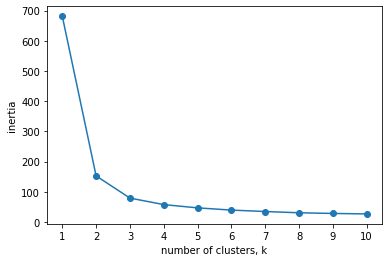

In [39]:
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


#### Exercise 1: Do same job using red wine data set ,you will learn
    a.	Standardscaler
    b.	Make_pipeline
https://datahexa.com/kmeans-clustering-with-wine-dataset/
